In [1]:
import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O, data manipulation 
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 

from sklearn.linear_model import LogisticRegression # to aapply Logistic Regression
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold # for cross validation
from sklearn.model_selection import GridSearchCV# for tuning parameter
from sklearn.preprocessing import StandardScaler # for normalization
# from sklearn.preprocessing import Imputer  # dealing with NaN
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier # to apply KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier # to apply Random Forest Classifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics # for checking error and accuracy of model
from sklearn import svm, datasets # for Support Vector Machine
from sklearn.svm import SVC


## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
df = pd.read_csv("trainDataset (1).csv")
print(df)

In [ ]:
print(df.describe())

In [4]:
count = 0
for i in range(df.shape[0]): #iterate over rows
    for j in range(df.shape[1]): #iterate over columns
        value = df.iloc[i, j] #get cell value
        if value == 999:
            count+=1

print(count)

17


PREPROCESSING BY DELETION

In [5]:
print(df.shape)

(400, 120)


In [6]:
list = []
for i in range(df.shape[0]): #iterate over rows
    for j in range(df.shape[1]): #iterate over columns
        value = df.iloc[i, j] #get cell value
        if value == 999:
            list.append(i)

print(list)

[10, 218, 218, 218, 253, 253, 253, 258, 258, 285, 285, 285, 330, 355, 362, 363, 387]


In [7]:
df.drop(df.index[list], inplace=True)

In [8]:
print(df.shape)

(390, 120)


In [12]:
df.to_csv("cleaned.csv",index=False)

PREPROCESSING BY FILLING WITH PREDICTION DATAWIG

FEATURE SELECTION

In [31]:
df = pd.read_csv("cleaned.csv")

<AxesSubplot:xlabel='pCR (outcome)', ylabel='count'>

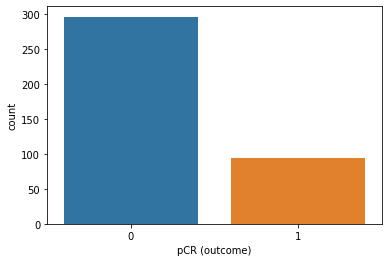

In [33]:
sns.countplot(x="pCR (outcome)", data=df)

In [34]:
df.shape

(390, 120)

pCR (outcome)                       AxesSubplot(0.125,0.848277;0.110714x0.0317227)
RelapseFreeSurvival (outcome)    AxesSubplot(0.257857,0.848277;0.110714x0.0317227)
Age                              AxesSubplot(0.390714,0.848277;0.110714x0.0317227)
ER                               AxesSubplot(0.523571,0.848277;0.110714x0.0317227)
PgR                              AxesSubplot(0.656429,0.848277;0.110714x0.0317227)
                                                       ...                        
original_ngtdm_Busyness                AxesSubplot(0.125,0.125;0.110714x0.0317227)
original_ngtdm_Coarseness           AxesSubplot(0.257857,0.125;0.110714x0.0317227)
original_ngtdm_Complexity           AxesSubplot(0.390714,0.125;0.110714x0.0317227)
original_ngtdm_Contrast             AxesSubplot(0.523571,0.125;0.110714x0.0317227)
original_ngtdm_Strength             AxesSubplot(0.656429,0.125;0.110714x0.0317227)
Length: 119, dtype: object

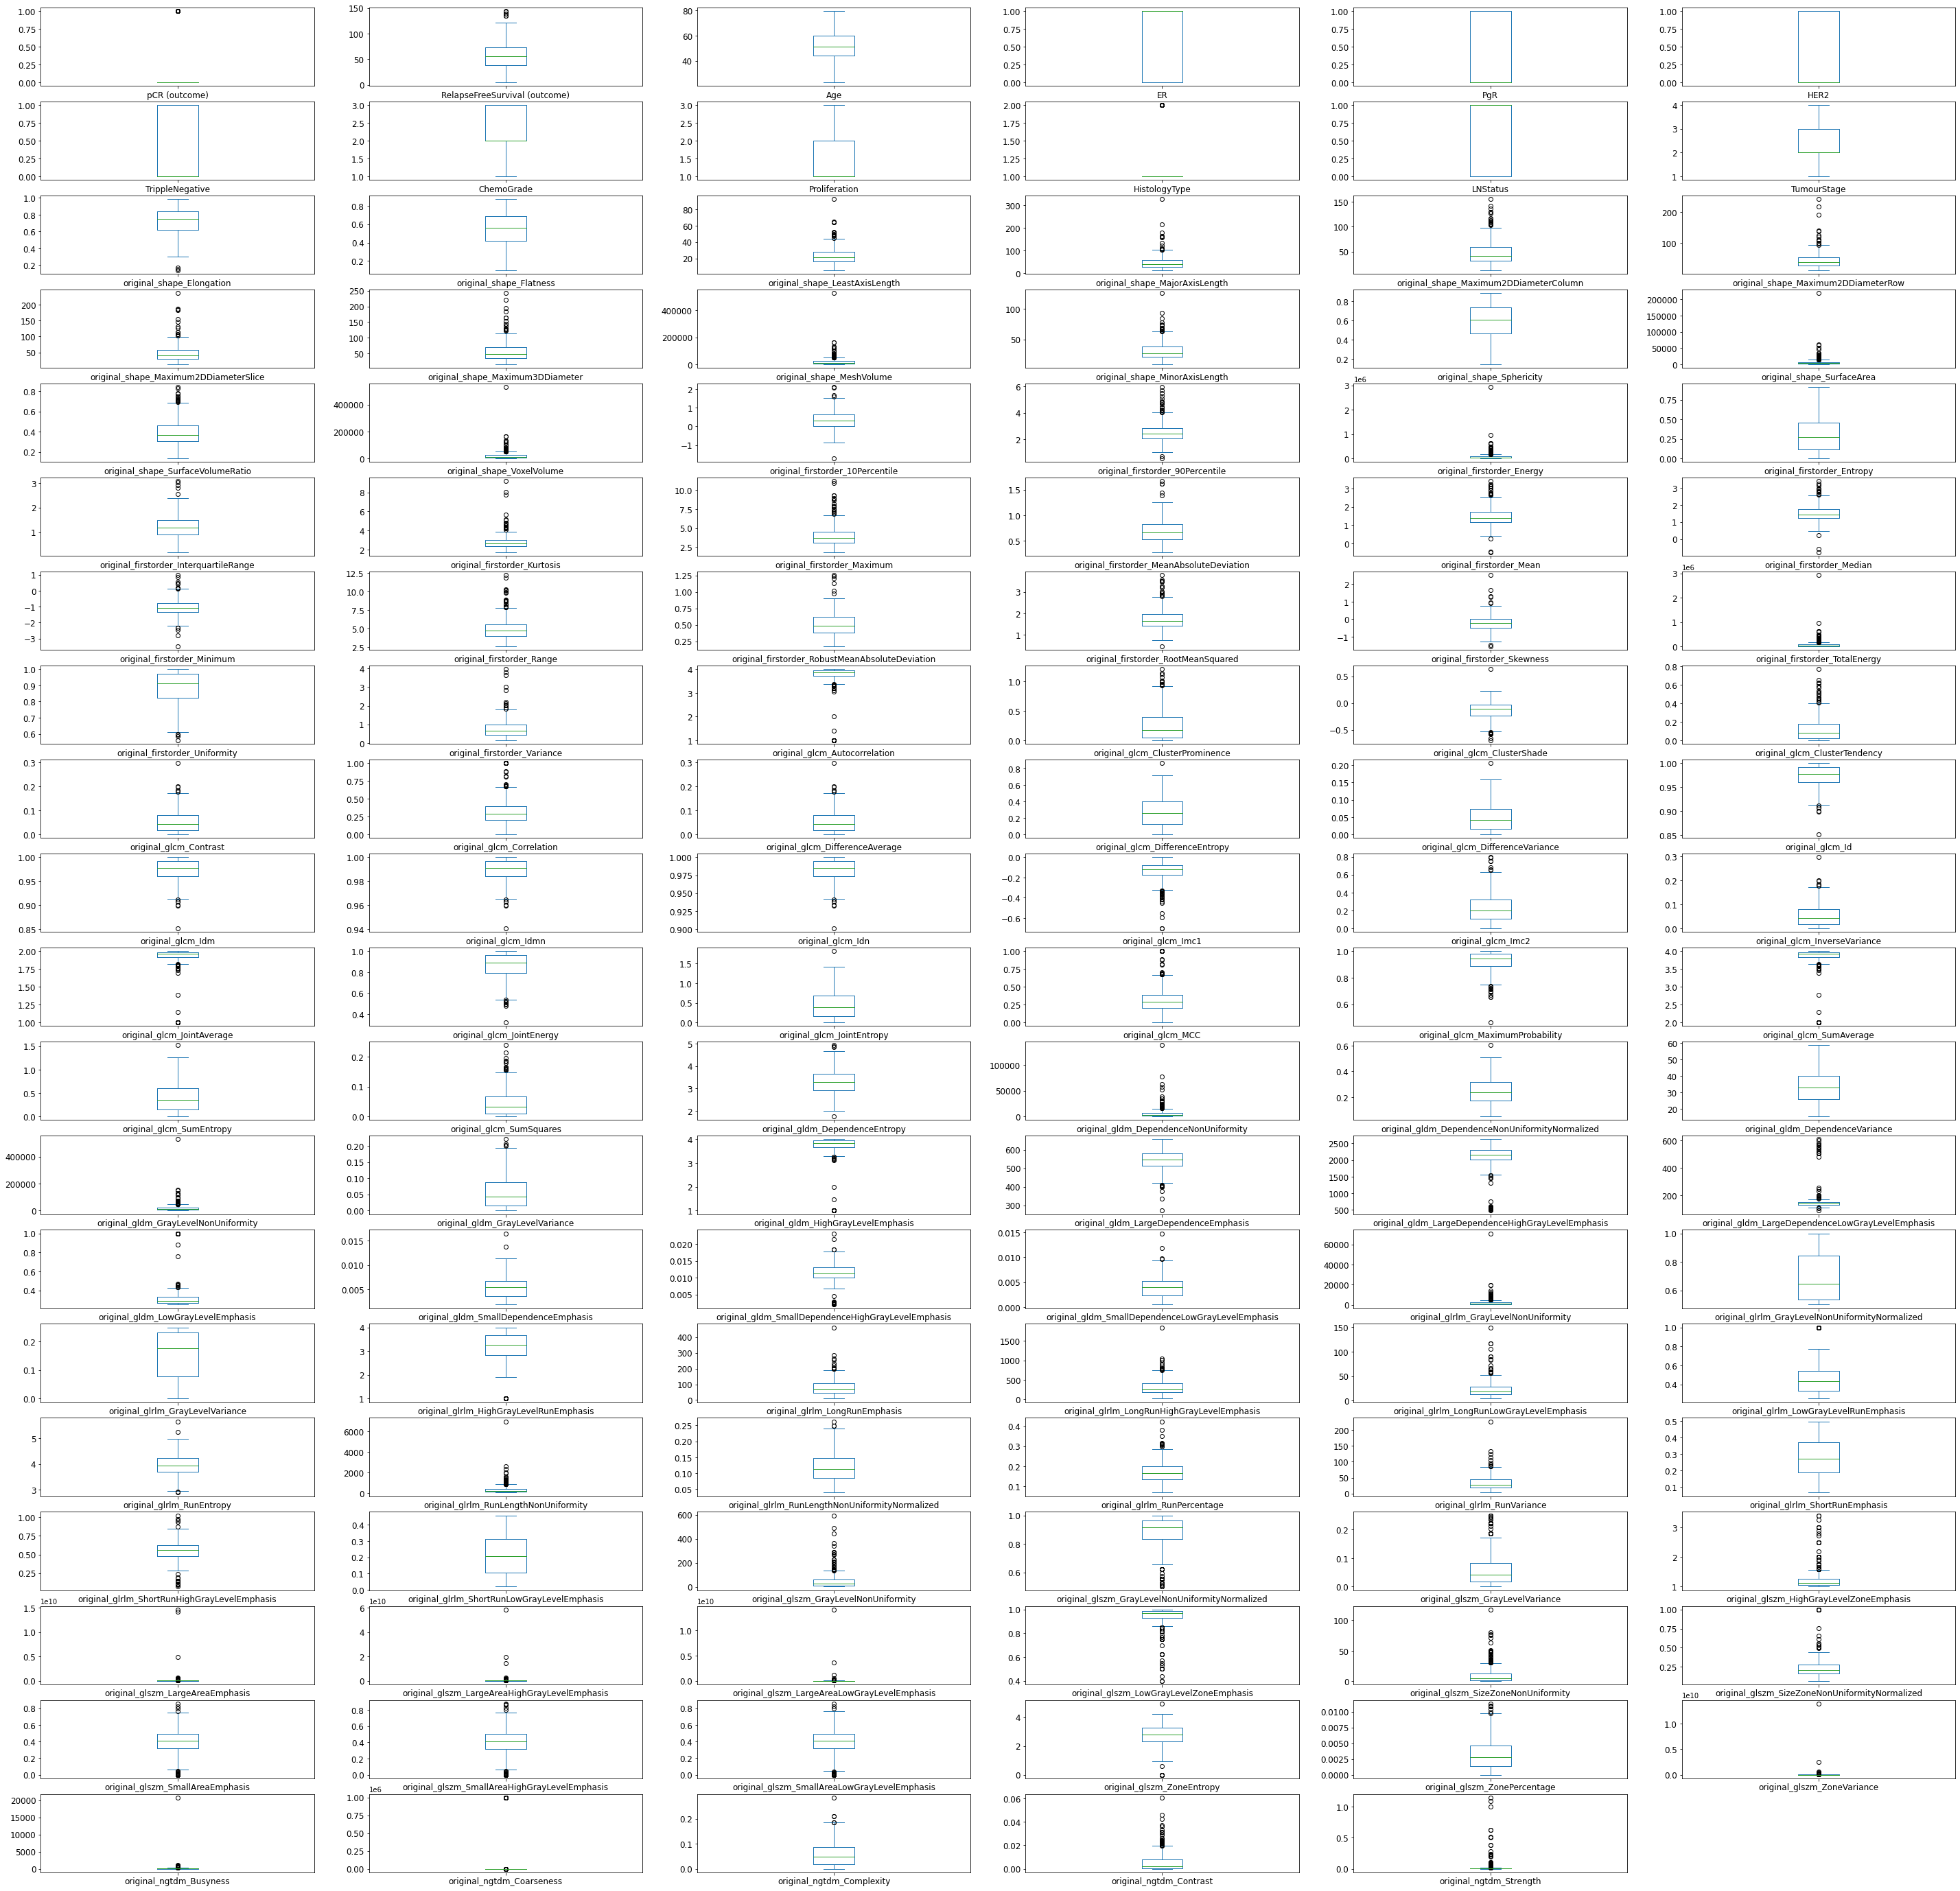

In [35]:
data_mean = df.iloc[:, :]
data_mean.plot(kind='box', subplots=True, layout=(20,6), sharex=False, 
sharey=False, fontsize=12, figsize=(50,50))

<AxesSubplot:>

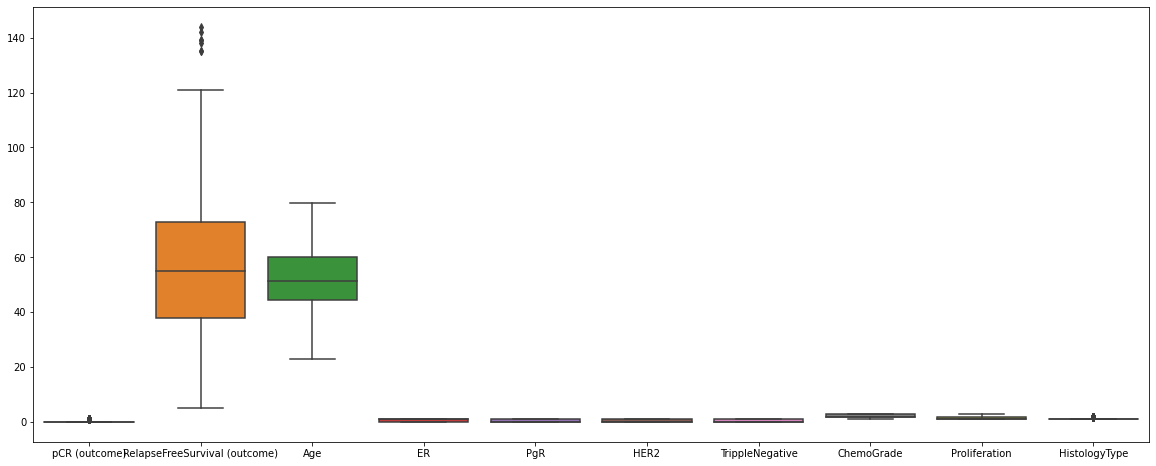

In [36]:
fig,ax=plt.subplots(1,figsize=(20,8))
sns.boxplot(data=df.iloc[:, 1:11],ax=ax) 

IndexError: index 32 is out of bounds for axis 0 with size 32

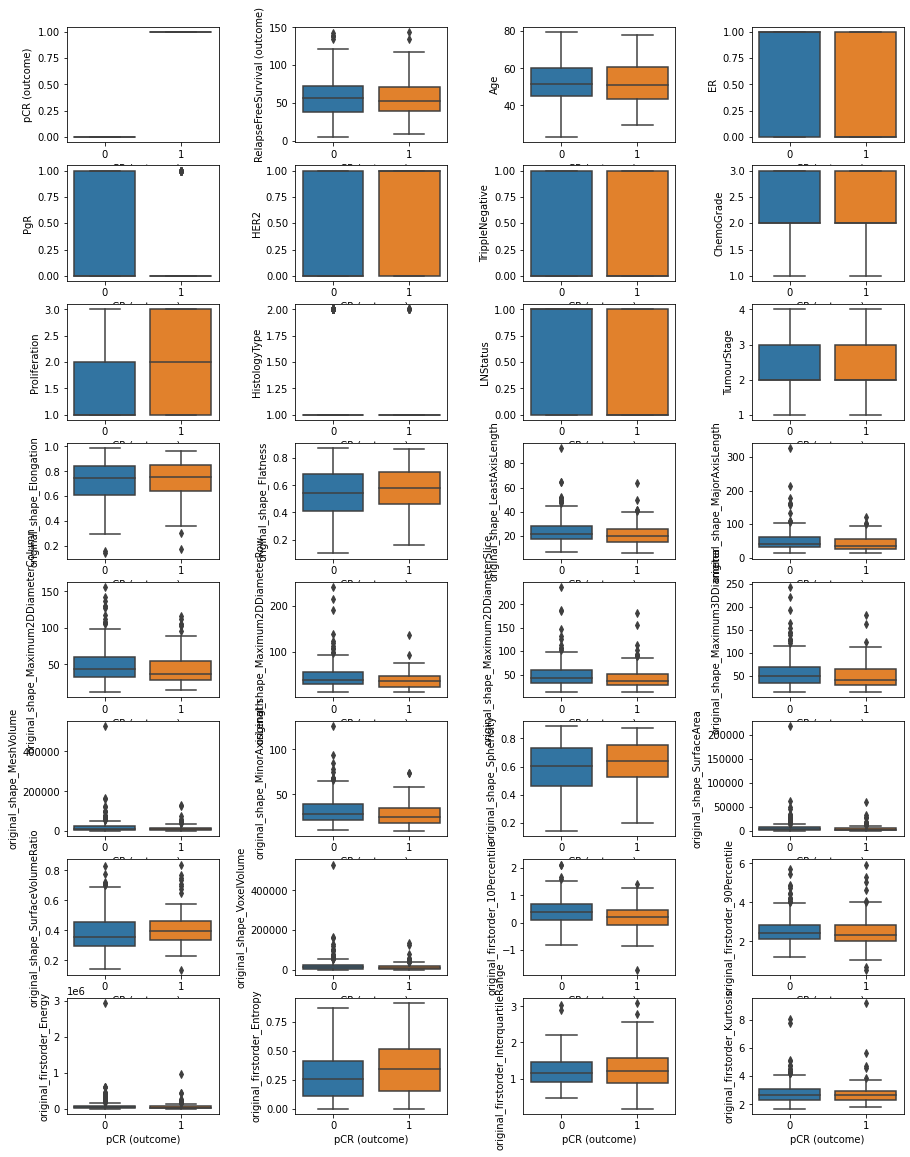

In [37]:
fig, axes = plt.subplots(nrows=8, ncols=4, figsize=(15,20))
fig.subplots_adjust(hspace =.2, wspace=.5)
axes = axes.ravel()
for i, col in enumerate(df.columns[1:]):
    sns.boxplot(y=col, x='pCR (outcome)', data=df, ax=axes[i])

<AxesSubplot:title={'center':'Breast Cancer Feature Correlation'}>

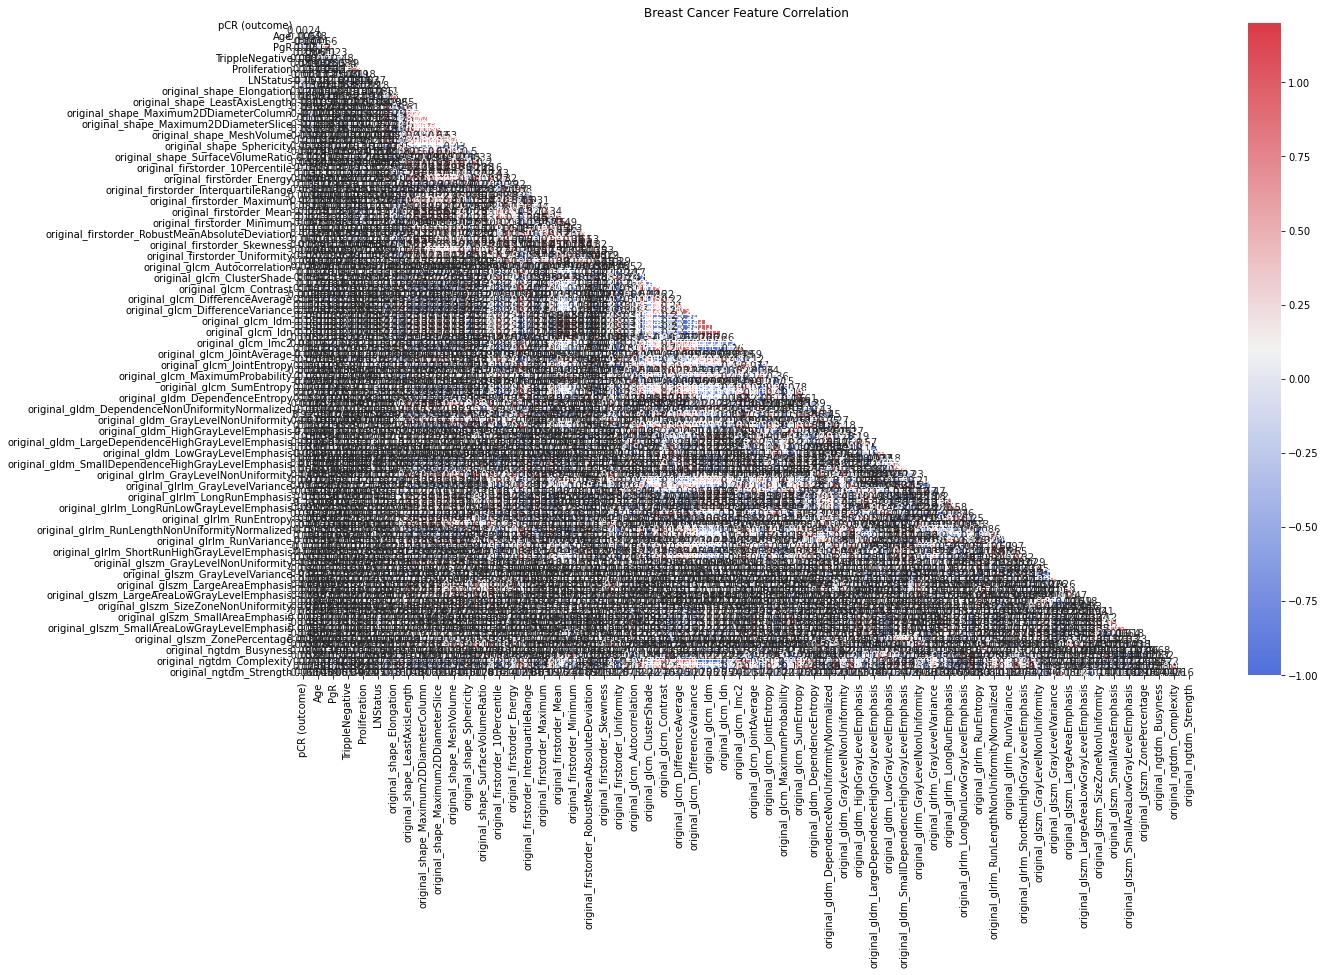

In [38]:
corrMatt = df.corr()
# Generate a mask for the upper triangle
mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(20, 12))
plt.title('Breast Cancer Feature Correlation')
# Generate a custom diverging colormap
cmap = sns.diverging_palette(260, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corrMatt, vmax=1.2, square=False, cmap=cmap, mask=mask, 
ax=ax, annot=True, fmt='.2g', linewidths=1)